In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [216]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston["data"]
y = boston["target"]
x.shape

(506, 13)

In [217]:
def compute_bias_variance(regressor, x, y, num_runs=2000):
    
    l = x.shape[0]
    av_answer = np.zeros(l, dtype=float)
    av_variance = np.zeros(l, dtype=float)
    touch_counter = np.zeros(l, dtype=float)
    sum_error = 0
    sum_pred = 0
    
    for i_run in range(num_runs):
        
        sample = np.random.randint(0, l, l)
        oob = list(set(range(l)) - set(sample))
        
        sum_pred += len(oob)
    
        x_train = x[sample]
        y_train = y[sample]
        regressor.fit(x_train, y_train)
    
        x_test = x[oob]
        y_test = y[oob]
        prediction = regressor.predict(x_test)
        
        touch_counter[oob] = touch_counter[oob] + 1
        
        av_answer[oob] = (prediction + \
                          (touch_counter[oob] - 1) * av_answer[oob]) / \
                        touch_counter[oob]
        
        av_variance[oob] = (((prediction - av_answer[oob]) ** 2) + \
                           (touch_counter[oob] - 1) * av_variance[oob]) / \
                        touch_counter[oob]

        sum_error += ((prediction - y_test) ** 2).sum()
    
    bias = ((av_answer - y) ** 2).sum() / l
    
    variance = av_variance.sum() / l
    
    error = sum_error / sum_pred
    
    res_dict = {'bias': bias, \
                'variance': variance, \
                'sum': bias + variance, \
               'error': error}
    return res_dict

In [218]:
res = compute_bias_variance(LinearRegression(), x, y, 1000)
res

{'bias': 23.716552423342918,
 'variance': 0.8980414692410109,
 'sum': 24.61459389258393,
 'error': 24.79012897918659}

In [219]:
res = compute_bias_variance(DecisionTreeRegressor(), x, y, 1000)
res

{'bias': 10.296753421738105,
 'variance': 12.884363243303401,
 'sum': 23.181116665041507,
 'error': 23.269490810177345}

In [223]:
# res = compute_bias_variance(RandomForestRegressor(), x, y, 1000)
# res

{'bias': 10.6342206787704,
 'variance': 2.225408657166901,
 'sum': 12.859629335937303,
 'error': 12.861975285262671}

In [222]:
bg_linear = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10)
res = compute_bias_variance(bg_linear, x, y, 1000)
res

{'bias': 23.761814098328927,
 'variance': 1.0108549033261405,
 'sum': 24.772669001655068,
 'error': 24.773855638297103}

In [224]:
bg_linear = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
res = compute_bias_variance(bg_linear, x, y, 1000)
res

{'bias': 10.688670635640568,
 'variance': 3.3598315658967426,
 'sum': 14.04850220153731,
 'error': 13.959706073268556}

In [225]:
# bg_linear = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10)
# res = compute_bias_variance(bg_linear, x, y, 1000)
# res

{'bias': 11.728456647943535,
 'variance': 1.4039224998839106,
 'sum': 13.132379147827445,
 'error': 13.211158677334259}

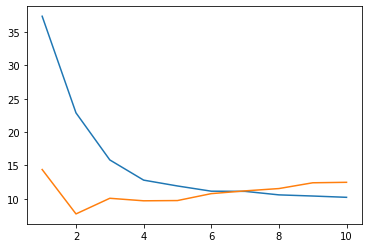

In [229]:
bias = []
variance = []
max_depth_list = []
for max_depth in range(1, 11):
    res = compute_bias_variance(DecisionTreeRegressor(max_depth=max_depth), x, y, 1000)
    max_depth_list.append(max_depth)
    bias.append(res['bias'])
    variance.append(res['variance'])
plt.plot(max_depth_list, bias)
plt.plot(max_depth_list, variance)

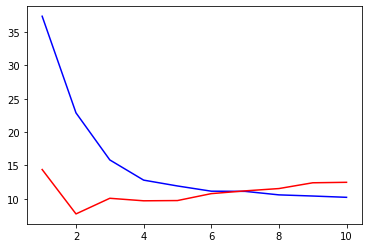

In [231]:
plt.plot(max_depth_list, bias, color='blue')
plt.plot(max_depth_list, variance, color='red')

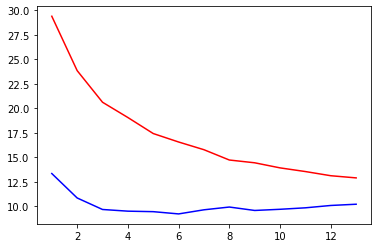

In [236]:
bias = []
variance = []
max_features_list = []
for max_features in range(1, 14):
    res = compute_bias_variance(DecisionTreeRegressor(max_features=max_features), x, y, 1000)
    max_features_list.append(max_features)
    bias.append(res['bias'])
    variance.append(res['variance'])
plt.plot(max_features_list, bias, color='blue')
plt.plot(max_features_list, variance, color='red')